# Effect Size, P-Values and Power - Lab

## Introduction 

In this lab, you'll run simulations to continue to investigate the relationship between effect size, p-values, power and sample size!

## Objectives
You will be able to:
* Describe how effect size, sample size and p_value are related to each other. 
* Use Welch's t-test for distributions that do not have a normality assumption.
* Plot visualisations to confirm the calculations and intuitions towards p_value and effect size. 
* Explain how with a same effect size, we may see different p_values with increasing number of simulations. 

## Philosophical Review

Remember that the underlying question behind all hypothesis tests is:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

This is exactly what a p-value represents: the chance that the observed data would satisfy the null hypothesis. As such, if the p-value is sufficiently low, you can declare the results statistically significant and reject the null hypothesis. Recall that this threshold is defined as $\alpha$, and is also the rate of type I errors. In this lab, you'll investigate the robustness of p-values and their relation with effect-size and sample-size. 

## Import Starter Functions

To start, import the functions stored in the `flatiron_stats.py` file. It contains the stats functions that you previously coded in the last lab: `welch_t(a,b)`, `welch_df(a, b)` and `p_value(a, b, two_sided=False)`. You'll then use these functions below to further investigate the relationship between p-values and sample size.

In [7]:
#Your code here; import the contents from flatiron_stats.py
#You may also wish to open up flatiron_stats.py in a text editor to preview its contents.
import flatiron_stats

## Generating Random Samples

Before you start running simulations, it will be useful to have a helper function that will generate random samples. Write such a function below which generates 2 random samples from 2 normal distributions. The function should take 6 input parameters:

* m1 - The underlying population mean for sample 1
* s1 - The underlying population standard deviation for sample 1
* n1 - The sample size for sample 1

* m2 - The underlying population mean for sample 2
* s2 - The underlying population standard deviation for sample 2
* n2 - The sample size for sample 2

In [3]:
import numpy as np
def generate_samples(m1,s1,n1,m2,s2,n2):
    #Your code here; have the function create two random samples using the input parameters
    
    sample1 = np.random.normal(loc=m1, scale=s1, size=n1)
    sample2 = np.random.normal(loc=m2, scale=s2, size=n2)
    
    return sample1, sample2

## Running a Simulation

For your first simulation, you're going to investigate how the p-value of an experiment relates to sample size when both samples are from identical underlying distributions. To do this, use your `generate_samples()` function along with the `p_value_welch_ttest()` function defined in the flatiron_stats file. Use sample sizes from 5 to 750. For each sample size, simulate 100 experiments. For each of these experiments, generate 2 samples of the given sample size. Each sample should have a standard deviation of 1. The first sample should have a mean of 5 and the second should have a mean of 5 plus the effect size, you hope to detect. Calculate the corresponding p-values for a Welch's t-test for each of these sample-pairs. Finally, use the p-values to calculate the power of the test. Remember that for all of the simulations where the effect size does not equal zero, the null hypothesis is not true. Store the overall power from the 100 simulations along with the corresponding sample size and effect size. Use varying effect sizes such as [0, 0.01,.1,.2, .5, 1, 2]. Afterwards, you'll then plot power vs sample size for various effect sizes.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [9]:
#Your code here

n_sim = 100
p = (np.empty(n_sim))
p.fill(np.nan)
rows = []

for effect in [0, 0.01, 0.1, 0.5, 1, 1, 2]:

    for sample_size in np.arange(5,755,5):
        for i in range(0,100):
            sample1, sample2 = generate_samples(5,1,sample_size, 5+effect, 1, sample_size)
            p[i] = flatiron_stats.p_value_welch_ttest(sample1, sample2, two_sided=False)
        num_null_rejects = np.sum(p<0.05)
        power = num_null_rejects/n_sim
        rows.append({'Effect Size':effect, 'Sample Size':sample_size, 'Power':power})

df = pd.DataFrame(rows)
df
        
    

#Pseudo code outline
# for effect size:
#     for sample_size:
#         perform 100 simulations
#         calculate power
#         store effect_size, sample_size, power for simulations

,Effect Size,Power,Sample Size
0,0.0,0.11,5
1,0.0,0.12,10
2,0.0,0.08,15
3,0.0,0.17,20
4,0.0,0.09,25
5,0.0,0.05,30
6,0.0,0.08,35
7,0.0,0.07,40
8,0.0,0.09,45
9,0.0,0.08,50


Now that you've simulated the data, go ahead and graph it! Label the x-axis sample size, the y-axis power, and be sure to include a legend for the various effect sizes.

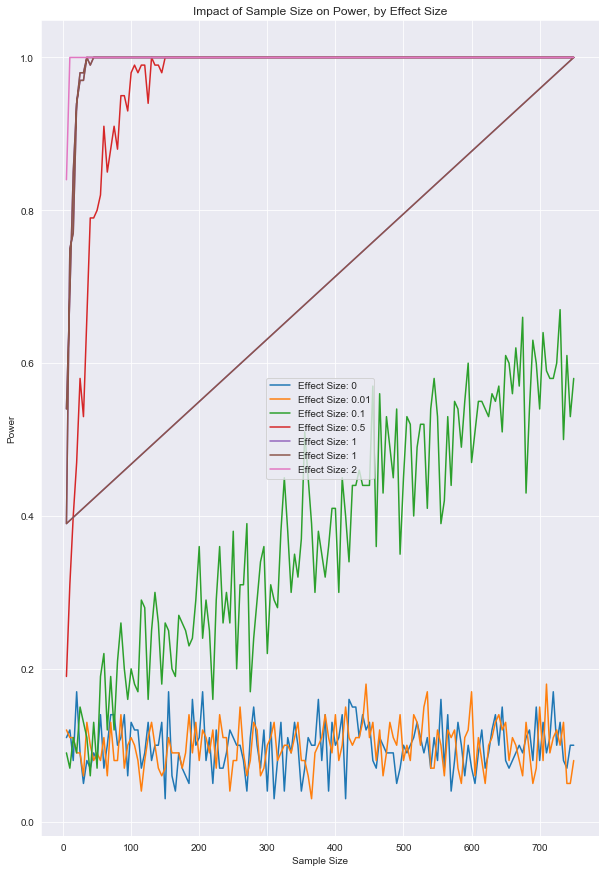

In [11]:
#You code here
plt.figure(figsize=(10,15))

for e in [0, 0.01, 0.1, 0.5, 1, 1, 2]:
    x=df.loc[df['Effect Size']==e, ['Sample Size']]
    y = df.loc[df['Effect Size']==e, ['Power']]
    plt.plot(x, y, label=f"Effect Size: {e}")

plt.legend()
plt.title('Impact of Sample Size on Power, by Effect Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.show()


As you can see, it's also typically incredibly difficult (if not impossible) to accuractely detect effect sizes below .1!

## Summary

This lesson summarizes and further builds upon the ideas that we saw in the previous labs. We learnt how p_value can be described as a function of effect size and for a given effect size, the p_value may get lower if we increase the sample size considerably. We also saw how p_value alone can not be used in order to identify some results as truly siginifcant, as this can be achieved when there is not a significant effect size. 